# **Customer Churn Prediction**

**project Aim:**

This project focuses on predicting customer churn (whether a customer will leave or remain with the company) based on various customer features. Using machine learning algorithms, we can identify patterns in customer behavior that are indicative of a potential churn, enabling the company to take proactive actions to retain valuable customers.

**Objective:**
*  To build a model that can predict if a customer will exit (churn) or stay with the company based on features like credit score, geography, age, balance, number of products, has credit card, is active member, etc.

*  **Key Features:**

*  **RowNumber:** Index of the row.

*  **CustomerId**: Unique identifier for each customer.

*  **Surname**: Surname of the customer (not used in the prediction model).

*  **CreditScore**: Customer’s credit score.

* **Geography**: Country of residence (France, Spain, Germany).

*  **Gender**: Gender of the customer (Male or Female).

*  **Age**: Age of the customer.

*  **Tenure**: Number of years the customer has been with the company.

*  **Balance**: Account balance of the customer.

*  **NumOfProducts**: Number of products the customer has with the company.

*  **HasCrCard**: Whether the customer has a credit card (1: Yes, 0: No).

*  **IsActiveMember**: Whether the customer is an active member (1: Yes, 0: No).

*  **EstimatedSalary**: Estimated salary of the customer.

*  **Exited**: Target variable (1: Exited, 0: Stayed).

In [1]:
# !pip install tensorflow

**Import Necessory Libraries**

In [2]:
# Data manipulation and analysis libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # Set seaborn style for better visuals

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn libraries for model building and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Scikit-learn models for classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# TensorFlow/Keras for deep learning models
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ReLU, Dropout  # Combine imports for cleaner code


**Load DataSet**

In [3]:
df = pd.read_csv("/content/Churn_Modelling.csv")
# Size of Dataset
df.shape

(10000, 14)

**Show Top 5 rows**

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **Data Analysis**

**Selecting Relevant Features for Churn Prediction**

In [5]:
df=df.iloc[:,3:14]

**Dataset Information and Statistical Analysis**

In [6]:
print(df.info())
print("\nStatistical Analysis\n")
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB
None

Statistical Analysis



,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Check Missing Values**

In [7]:
df.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


**Duplicated Values**

In [8]:
print("Duplicated Values -- >> ",df.duplicated().sum())

Duplicated Values -- >>  0


**Exploring Unique Values in Each Column**

In [9]:
for i in df.columns:
  print(f"\nNUnique values in {i} -->> [{df[i].nunique()}]")
  print(f"Unique values in {i} -->> [{df[i].unique()}]\n")


NUnique values in CreditScore -->> [460]
Unique values in CreditScore -->> [[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 73

# **Exited**

*  The dataset is imbalanced, with 7,963 samples labeled as 0 (Not Exited) and only 2,037 samples labeled as 1 (Exited).

In [10]:
# value counts
df["Exited"].value_counts()

,count
Exited,
0,7963
1,2037


# **Data Visualization**

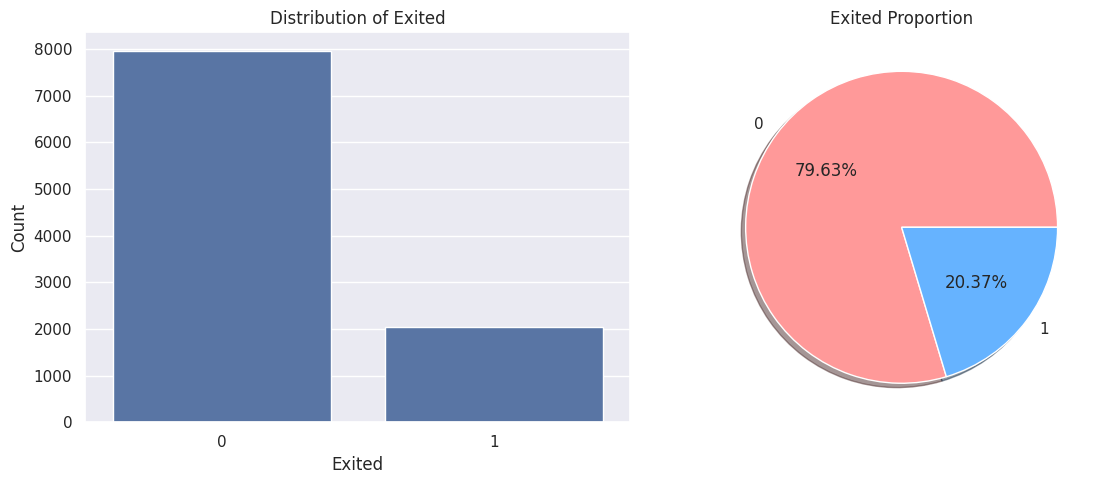

In [11]:
# Set up the figure and axes for two plots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Count plot for the distribution of 'Exited'
sns.countplot(x=df["Exited"], ax=ax[0])
ax[0].set_title("Distribution of Exited")
ax[0].set_xlabel("Exited")  # Adding x-axis label
ax[0].set_ylabel("Count")   # Adding y-axis label

# Pie chart for the 'Exited' value counts
ax[1].pie(df["Exited"].value_counts(),
          labels=df["Exited"].value_counts().index,
          autopct='%.2f%%', shadow=True, colors=['#ff9999','#66b3ff'])
ax[1].set_title("Exited Proportion")

# Display the plot
plt.tight_layout()
plt.show()


**Geography**

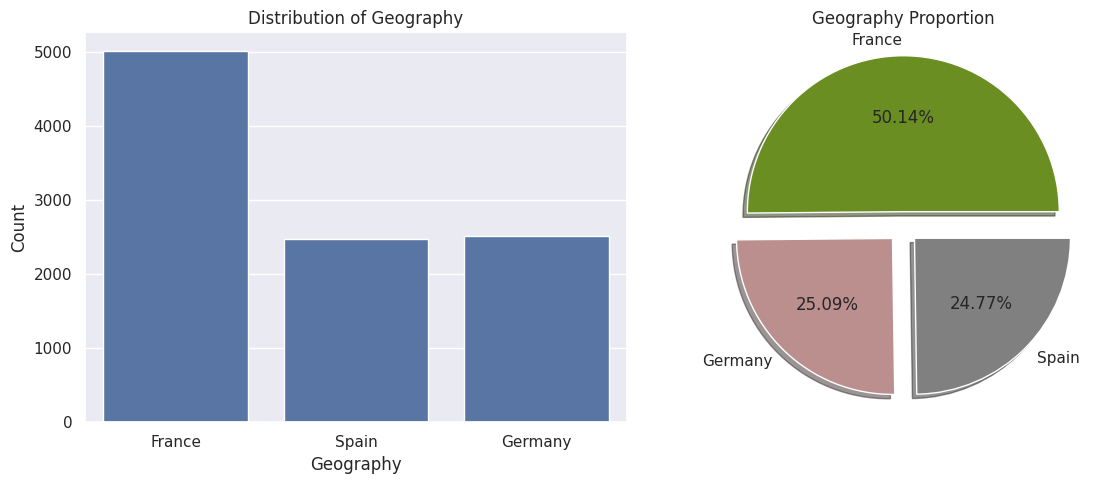

In [12]:
# Set up the figure and axes for two plots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Count plot for the distribution of 'Exited'
sns.countplot(x=df["Geography"], ax=ax[0])
ax[0].set_title("Distribution of Geography")
ax[0].set_xlabel("Geography")  # Adding x-axis label
ax[0].set_ylabel("Count")   # Adding y-axis label

# Pie chart for the 'Exited' value counts
ax[1].pie(df["Geography"].value_counts(),
          labels=df["Geography"].value_counts().index,
          autopct='%.2f%%', shadow=True, colors=['olivedrab', 'rosybrown', 'gray'],
          explode=[0.1,0.1,0.1])
ax[1].set_title("Geography Proportion")

# Display the plot
plt.tight_layout()
plt.show()


**Gender**

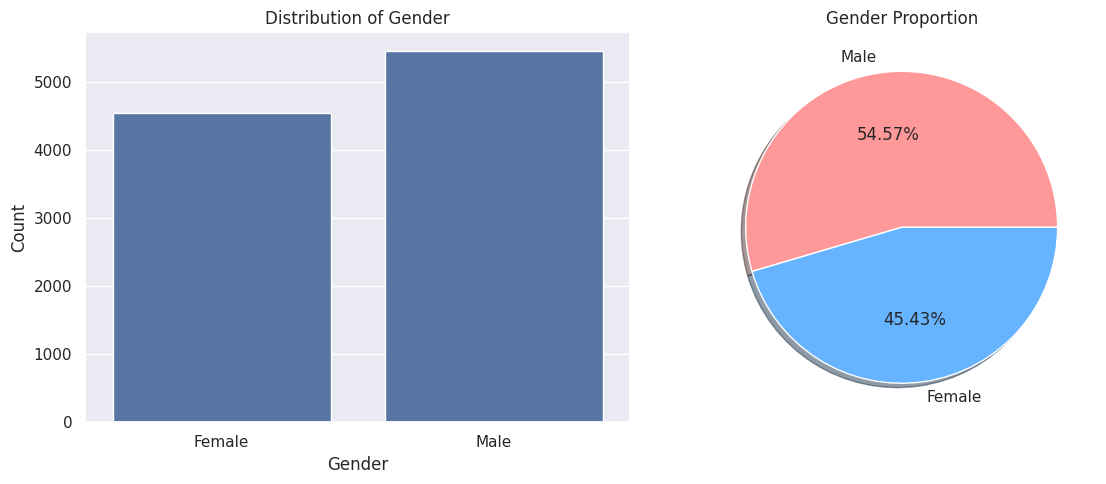

In [13]:
# Set up the figure and axes for two plots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Count plot for the distribution of 'Exited'
sns.countplot(x=df["Gender"], ax=ax[0])
ax[0].set_title("Distribution of Gender")
ax[0].set_xlabel("Gender")  # Adding x-axis label
ax[0].set_ylabel("Count")   # Adding y-axis label

# Pie chart for the 'Exited' value counts
ax[1].pie(df["Gender"].value_counts(),
          labels=df["Gender"].value_counts().index,
          autopct='%.2f%%', shadow=True, colors=['#ff9999','#66b3ff'])
ax[1].set_title("Gender Proportion")

# Display the plot
plt.tight_layout()
plt.show()


**Age Distibution**

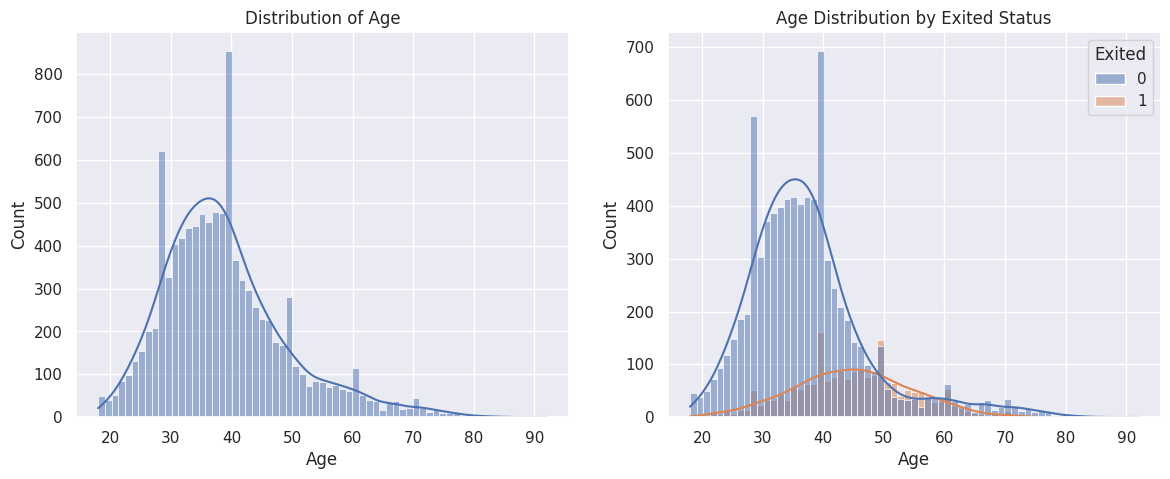

In [14]:
# Set up the figure and axes for two plots
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Histogram of Age distribution
sns.histplot(df["Age"], kde=True, ax=ax[0])
ax[0].set_title("Distribution of Age")

# Histogram of Age distribution with Exited as hue
sns.histplot(data=df, x="Age", hue="Exited", kde=True, ax=ax[1])
ax[1].set_title("Age Distribution by Exited Status")

# Show the plots
plt.show()


**Insight**:
*  Older customers are more likely to leave the bank.

**Balaced Distribution**

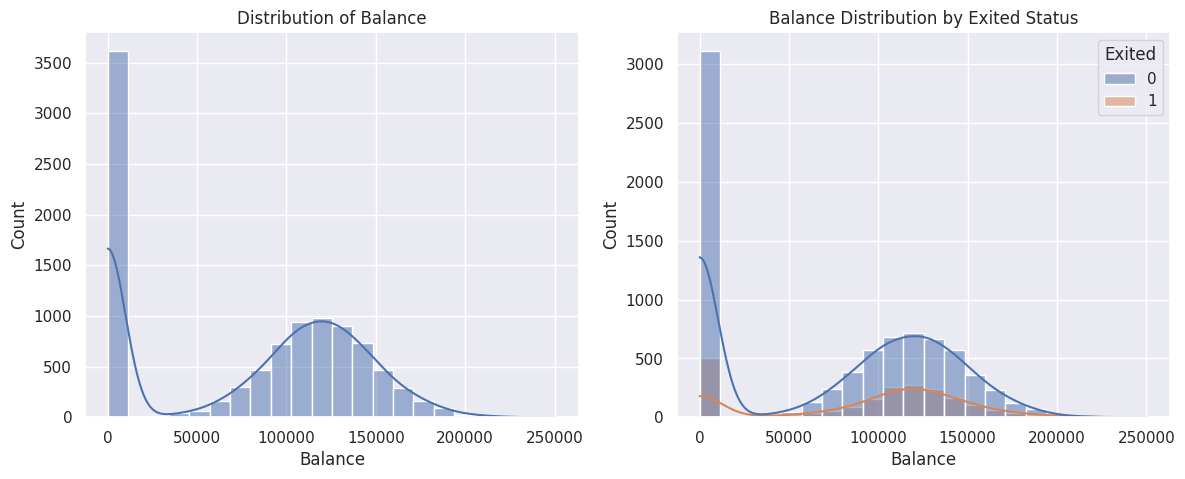

In [15]:
# Set up the figure and axes for two plots
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Histogram of Age distribution
sns.histplot(df["Balance"], kde=True, ax=ax[0])
ax[0].set_title("Distribution of Balance")

# Histogram of Age distribution with Exited as hue
sns.histplot(data=df, x="Balance", hue="Exited", kde=True, ax=ax[1])
ax[1].set_title("Balance Distribution by Exited Status")

# Show the plots
plt.show()


**insight**:

customers with higher balances have a higher chance of exiting.

**Correlation Matrix of Numerical Features**

In [16]:
num_feature = df.select_dtypes(include='number')
corr_metrix = num_feature.corr()
corr_metrix

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


**Correlation Heatmap of Numerical Features**

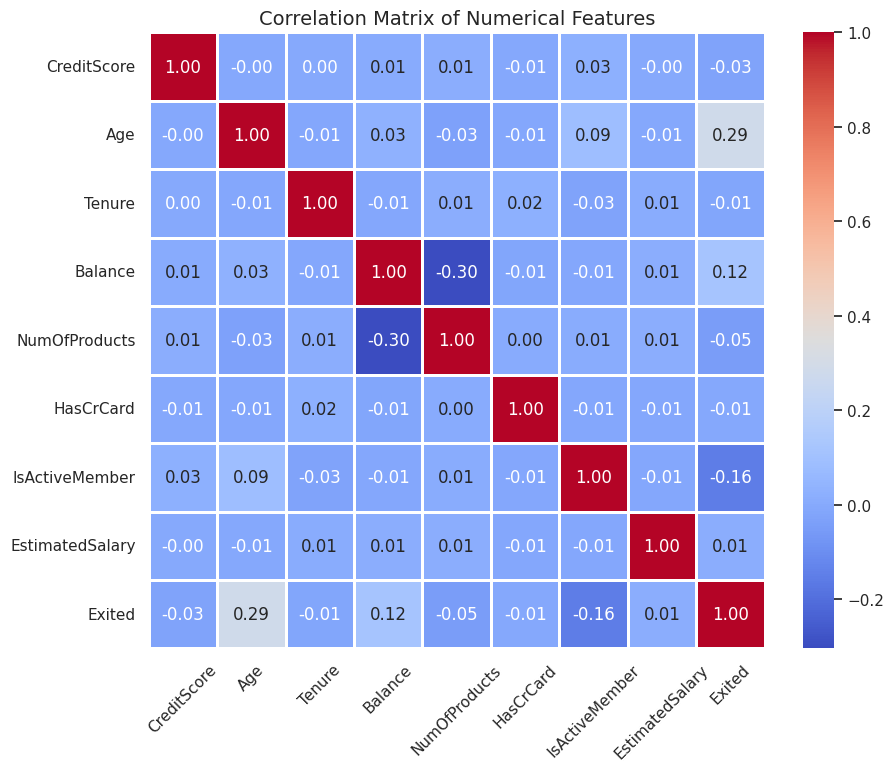

In [17]:
# Plot the Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_metrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=2)

# Set title and display the plot
plt.title("Correlation Matrix of Numerical Features", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


In [18]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


# **Feature Engeneering**

**Selecting feature columns (X) and target column (y)**

In [19]:
X=df.drop('Exited',axis=1)
y= df["Exited"]

print("X shape (X) -->> ", X.shape)
print("y shape (X) -->> ", y.shape)

X shape (X) -->>  (10000, 10)
y shape (X) -->>  (10000,)


**Splitting the dataset into training and testing sets**

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print("Training set shape (X) -->> ", x_train.shape)
print("Training set shape (y) -->> ", y_train.shape)
print("Testing set shape (X) -->> ", x_test.shape)
print("Testing set shape (y) -->> ", y_test.shape)


Training set shape (X) -->>  (8000, 10)
Training set shape (y) -->>  (8000,)
Testing set shape (X) -->>  (2000, 10)
Testing set shape (y) -->>  (2000,)


**One-Hot Encoding for Categorical Features (Geography and Gender)**

In [21]:
# Initialize OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False, dtype=np.int8)

# Fit and transform training data
x_train_cat = ohe.fit_transform(x_train[["Geography", "Gender"]])

# Transform test data (do not fit again!)
x_test_cat = ohe.transform(x_test[["Geography", "Gender"]])

# Convert to DataFrames
ohe_feature_names = ohe.get_feature_names_out(["Geography", "Gender"])
x_train_cat = pd.DataFrame(x_train_cat, columns=ohe_feature_names)
x_test_cat = pd.DataFrame(x_test_cat, columns=ohe_feature_names)

# Reset index to avoid misalignment
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
x_train_cat = x_train_cat.reset_index(drop=True)
x_test_cat = x_test_cat.reset_index(drop=True)

# Drop original categorical columns
x_train.drop(["Geography", "Gender"], axis=1, inplace=True)
x_test.drop(["Geography", "Gender"], axis=1, inplace=True)

# Concatenate encoded features with the original DataFrame
x_train = pd.concat([x_train, x_train_cat], axis=1)
x_test = pd.concat([x_test, x_test_cat], axis=1)


**Feature Scaling using StandardScaler**

In [22]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [23]:
# Convert y_train to a NumPy array and reshape it
y_train = y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)

In [24]:
# Print the shapes of the training features and target variables
print("Shape of x_train (features):", x_train.shape)
print("Shape of y_train after reshape (target):", y_train.shape)


Shape of x_train (features): (8000, 11)
Shape of y_train after reshape (target): (8000, 1)


**Apply SMOTE (Synthetic Minority Over-sampling Technique) to Balance the Training Data**

In [25]:
# Initialize SMOTE
smote = SMOTE()

# Apply SMOTE to the training data to balance the dataset
x_train, y_train = smote.fit_resample(x_train, y_train)


# **Model Trainning**

# **ANN**

In [26]:
# Initialize the ANN
classifier = Sequential()

In [27]:
# Adding the input Layer
classifier.add(Dense(units=11,activation ='relu'))

In [28]:
# Adding the first Layer
classifier.add(Dense(units=7,activation='relu'))

In [29]:
# Adding the Second Layer
classifier.add(Dense(units=6,activation='relu'))

In [30]:
# Adding the Output Liyer
classifier.add(Dense(1,activation='sigmoid'))

In [31]:
# First wey of using opimizer
# classifier.compile(optimizer='adam',loss='binary_crossentorpy',metrics=['accuracy'])

In [32]:
# second wey of using optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto'
)


In [34]:
class_weight = {0: 1., 1: 3.}
model_histoy = classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stop,class_weight=class_weight)

Epoch 1/1000
852/852 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.6866 - loss: 0.9259 - val_accuracy: 0.7700 - val_loss: 0.4449
Epoch 2/1000
852/852 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.7409 - loss: 0.7686 - val_accuracy: 0.8448 - val_loss: 0.4265
Epoch 3/1000
852/852 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7702 - loss: 0.7254 - val_accuracy: 0.7685 - val_loss: 0.4526
Epoch 4/1000
852/852 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7877 - loss: 0.6971 - val_accuracy: 0.8217 - val_loss: 0.3970
Epoch 5/1000
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7883 - loss: 0.6798 - val_accuracy: 0.7800 - val_loss: 0.4738
Epoch 6/1000
852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7860 - loss: 0.6953 - val_accuracy: 0.7585 - val_loss: 0.4880
Epoch 7/1000
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7798 - loss: 0.6946 - val_accuracy: 0.8539 - val_loss: 0.3649
Epoch 8/1000
852/852 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7762 - loss: 0.68

**Visualizing Model Accuracy Over Epochs**

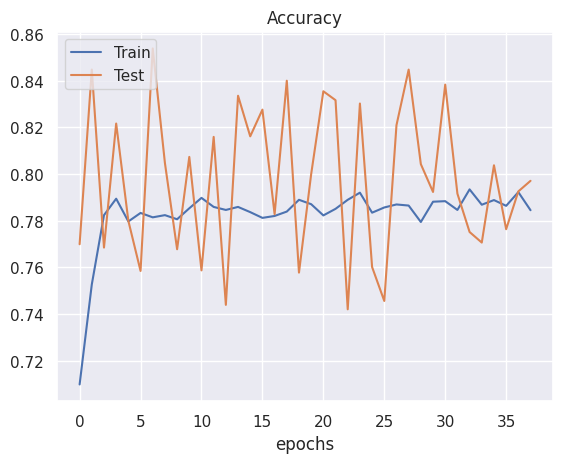

In [35]:
plt.plot(model_histoy.history['accuracy'])
plt.plot(model_histoy.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("epochs")
plt.title("Accuracy")
plt.legend(['Train','Test'],loc='upper left')
plt.show()

**Visualizing Model Loss Over Epochs**

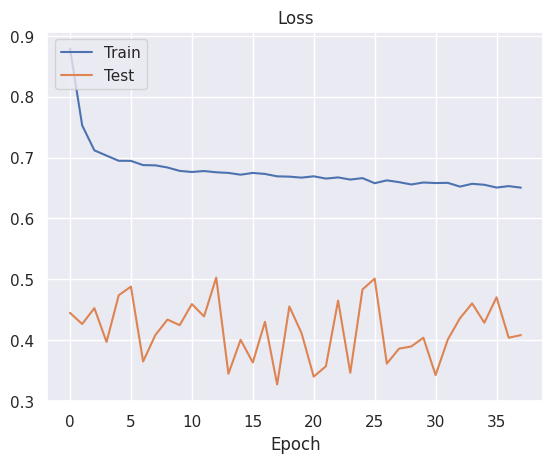

In [36]:
plt.plot(model_histoy.history['loss'])
plt.plot(model_histoy.history['val_loss'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.title("Loss")
plt.legend(['Train','Test'],loc='upper left')
plt.show()

In [37]:
model_histoy.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [38]:
train_pred_ann = (classifier.predict(x_train) > 0.5).astype(int)
test_pred_ann = (classifier.predict(x_test) > 0.5).astype(int)

# Print accuracy and confusion matrix for the training set
print("Training Set Metrics:")
print(f"Accuracy: {accuracy_score(y_train, train_pred_ann)}")
print('Classification Report\n',classification_report(y_train, train_pred_ann))
print("Confusion Matrix:")
print(confusion_matrix(y_train, train_pred_ann))
print('-' * 20)

# Print accuracy and confusion matrix for the testing set
print("Testing Set Metrics:")
print(f"Accuracy: {accuracy_score(y_test, test_pred_ann)}")
print('Classification Report\n',classification_report(y_test, test_pred_ann))
print("Confusion Matrix:")
print(confusion_matrix(y_test, test_pred_ann))


398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training Set Metrics:
Accuracy: 0.7944461925739459
Classification Report
               precision    recall  f1-score   support

           0       0.79      0.80      0.79      6356
           1       0.80      0.79      0.79      6356

    accuracy                           0.79     12712
   macro avg       0.79      0.79      0.79     12712
weighted avg       0.79      0.79      0.79     12712

Confusion Matrix:
[[5066 1290]
 [1323 5033]]
--------------------
Testing Set Metrics:
Accuracy: 0.7645
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.76      0.84      1607
           1       0.44      0.77      0.56       393

    accuracy                           0.76      2000
   macro avg       0.69      0.77      0.70      2000
weighted avg       0.83      0.76      0.78      2000

Confusion Matrix:
[[1228  379]
 [  92  301]]


# **RandomForestClassifier**

In [39]:
# Initialize and fit the RandomForest model
rand = RandomForestClassifier(random_state=42,class_weight='balanced')
rand.fit(x_train, y_train)

# Predict on the training and testing data
train_pred = rand.predict(x_train)
test_pred = rand.predict(x_test)

# Print accuracy and confusion matrix for the training set
print("Training Set Metrics:")
print(f"Accuracy: {accuracy_score(y_train, train_pred)}")
print('Classification Report\n',classification_report(y_train, train_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_train, train_pred))
print('-' * 20)

# Print accuracy and confusion matrix for the testing set
print("Testing Set Metrics:")
print(f"Accuracy: {accuracy_score(y_test, test_pred)}")
print('Classification Report\n',classification_report(y_test, test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, test_pred))


Training Set Metrics:
Accuracy: 1.0
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6356
           1       1.00      1.00      1.00      6356

    accuracy                           1.00     12712
   macro avg       1.00      1.00      1.00     12712
weighted avg       1.00      1.00      1.00     12712

Confusion Matrix:
[[6356    0]
 [   0 6356]]
--------------------
Testing Set Metrics:
Accuracy: 0.837
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.89      0.90      1607
           1       0.58      0.61      0.60       393

    accuracy                           0.84      2000
   macro avg       0.74      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000

Confusion Matrix:
[[1434  173]
 [ 153  240]]


# **LogisticRegession**

In [40]:

# Initialize and fit the Logistic Regression model
log_reg = LogisticRegression(random_state=42,class_weight='balanced')
log_reg.fit(x_train, y_train)

# Predict on the training and testing data
train_pred = log_reg.predict(x_train)
test_pred = log_reg.predict(x_test)

# Print accuracy and confusion matrix for the training set
print("Training Set Metrics:")
print(f"Accuracy: {accuracy_score(y_train, train_pred)}")
print('Classification Report\n',classification_report(y_train, train_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_train, train_pred))
print('-' * 20)

# Print accuracy and confusion matrix for the testing set
print("Testing Set Metrics:")
print(f"Accuracy: {accuracy_score(y_test, test_pred)}")
print('Classification Report\n',classification_report(y_test, test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, test_pred))


Training Set Metrics:
Accuracy: 0.7125550660792952
Classification Report
               precision    recall  f1-score   support

           0       0.71      0.72      0.72      6356
           1       0.72      0.70      0.71      6356

    accuracy                           0.71     12712
   macro avg       0.71      0.71      0.71     12712
weighted avg       0.71      0.71      0.71     12712

Confusion Matrix:
[[4587 1769]
 [1885 4471]]
--------------------
Testing Set Metrics:
Accuracy: 0.726
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.73      0.81      1607
           1       0.39      0.72      0.51       393

    accuracy                           0.73      2000
   macro avg       0.65      0.72      0.66      2000
weighted avg       0.81      0.73      0.75      2000

Confusion Matrix:
[[1171  436]
 [ 112  281]]


# **XGBoost Classifier**

In [41]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Calculate class imbalance ratio
ratio = np.sum(y_train == 0) / np.sum(y_train == 1)

# Initialize XGBClassifier
xgb = XGBClassifier(random_state=42, scale_pos_weight=ratio)

# Train the model
xgb.fit(x_train, y_train)

# Predictions
train_pred = xgb.predict(x_train)
test_pred = xgb.predict(x_test)

# Print metrics for training set
print("Training Set Metrics:")
print(f"Accuracy: {accuracy_score(y_train, train_pred)}")
print('Classification Report\n',classification_report(y_train, train_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_train, train_pred))
print('-' * 20)

# Print metrics for testing set
print("Testing Set Metrics:")
print(f"Accuracy: {accuracy_score(y_test, test_pred)}")
print('Classification Report\n',classification_report(y_test, test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, test_pred))


Training Set Metrics:
Accuracy: 0.9631057268722467
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      6356
           1       0.98      0.94      0.96      6356

    accuracy                           0.96     12712
   macro avg       0.96      0.96      0.96     12712
weighted avg       0.96      0.96      0.96     12712

Confusion Matrix:
[[6252  104]
 [ 365 5991]]
--------------------
Testing Set Metrics:
Accuracy: 0.8545
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      1607
           1       0.65      0.57      0.61       393

    accuracy                           0.85      2000
   macro avg       0.77      0.75      0.76      2000
weighted avg       0.85      0.85      0.85      2000

Confusion Matrix:
[[1486  121]
 [ 170  223]]


# **Save the Model**

In [42]:
import pickle

# Save the model
with open('model.pkl', 'wb') as file:
    pickle.dump(classifier, file)


In [43]:
# Load the model
with open('model.pkl', 'rb') as file:
    ANN_model = pickle.load(file)